In [1]:
!pip3 install tweepy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 KB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 5.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: tweepy
    Found existing installation: tweepy 3.10.0
    Uninstalling tweepy-3.10.0:
      Successfully uninstalled tweepy-3.10.0


In [2]:
import tweepy
import numpy as np
import pandas as pd
from textblob import TextBlob

In [3]:
#Chave
bearer_token = "AAAAAAAAAAAAAAAAAAAAAGJrlgEAAAAAbwqHxRmdRHG1qqeZTzx7OrESAig%3D4QiKcBbjpuEmOXMRala40QU0D2QSEWEPIVyIRKcjlG29JDgACA"

client = tweepy.Client(bearer_token=bearer_token)

In [ ]:
#response = client.search_recent_tweets("saquarema", max_results=100)

In [ ]:
#print(response.meta)

In [ ]:
#tweets = response.data

In [ ]:
#type(tweets)

list

In [ ]:
#for tweet in tweets:
 #   print(tweet)
   # print(tweet.text)
    #print(tweet.)
    #print(tweet.

In [4]:
results = []
resultid = []
resulttext = []

In [5]:
type(results)

list

In [ ]:
#results.clear()
#resultid.clear()
#resulttext.clear()


In [6]:
df2 = pd.DataFrame(columns=['ID', 'text','sentiment'])

In [7]:
public_tweets = tweepy.Paginator(client.search_recent_tweets, query='saquarema', 
                              max_results=100).flatten(limit=1000)

In [8]:
analysis = None

In [9]:
count = 0
for tweet in public_tweets:
  analysis = TextBlob(tweet.text)
  polarity = analysis.sentiment.polarity

  df2.loc[count] = [tweet.id]+[tweet.text]+[polarity]
  
  count += 1

In [10]:
df2

,ID,text,sentiment
0,1633586240787210241,RT @_redmafia: logo mais as 19h tem boy from s...,0.0
1,1633586232667062274,RT @CentralBotafogo: Hoje eu sou apaixonado pe...,0.0
2,1633585257071902721,Fui chamada pra tomar um chopp de dia das mulh...,0.0
3,1633584527317540870,RT @CentralBotafogo: Hoje eu sou apaixonado pe...,0.0
4,1633584403824668672,Bruna querendo que va pra saquarema ver o film...,0.0
...,...,...,...
745,1631080090082615300,"Queria ficar em saquarema pra sempre, q ódio",0.0
746,1631075230134181888,Feliz que cheguei perto no concurso de Saquare...,0.0
747,1631069867955593217,Gabi merece pelo menos treinar em Saquarema 🫰🏻...,0.0
748,1631064847575121920,Em saquarema eu vim pra marolar vendo as creti...,0.0


In [ ]:
!pip install nltk
import nltk
#nltk.download()  <-- Run this if it's your first time using nltk to download all of the datasets and models


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
df2.head()

,ID,text,sentiment
0,1633586240787210241,RT @_redmafia: logo mais as 19h tem boy from s...,0.0
1,1633586232667062274,RT @CentralBotafogo: Hoje eu sou apaixonado pe...,0.0
2,1633585257071902721,Fui chamada pra tomar um chopp de dia das mulh...,0.0
3,1633584527317540870,RT @CentralBotafogo: Hoje eu sou apaixonado pe...,0.0
4,1633584403824668672,Bruna querendo que va pra saquarema ver o film...,0.0


In [15]:
df2.iloc[4]

ID                                         1633584403824668672
text         Bruna querendo que va pra saquarema ver o film...
sentiment                                                  0.0
Name: 4, dtype: object

In [16]:
df2.iloc[1,1]

'RT @CentralBotafogo: Hoje eu sou apaixonado pelo Boavista desde pequeno.\n\nO alviverde de saquarema trabalhará para nós. https://t.co/RfJ0NO…'

In [17]:
import re

In [18]:
# Essa expressão regular remove todas as palavras com números e também torna todas as palavras em minúsculas
lower_alpha = lambda x: re.sub(r"""\w*\d\w*""", ' ', x.lower())
df2['text'] = df2.text.map(lower_alpha)

In [19]:
df2.head()

,ID,text,sentiment
0,1633586240787210241,rt @_redmafia: logo mais as tem boy from saq...,0.0
1,1633586232667062274,rt @centralbotafogo: hoje eu sou apaixonado pe...,0.0
2,1633585257071902721,fui chamada pra tomar um chopp de dia das mulh...,0.0
3,1633584527317540870,rt @centralbotafogo: hoje eu sou apaixonado pe...,0.0
4,1633584403824668672,bruna querendo que va pra saquarema ver o film...,0.0


In [20]:
# Essa expressão regular remove toda a pontuação
import string

punc_re = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
df2['text'] = df2.text.map(punc_re)

df2.head()

,ID,text,sentiment
0,1633586240787210241,rt redmafia logo mais as tem boy from saq...,0.0
1,1633586232667062274,rt centralbotafogo hoje eu sou apaixonado pe...,0.0
2,1633585257071902721,fui chamada pra tomar um chopp de dia das mulh...,0.0
3,1633584527317540870,rt centralbotafogo hoje eu sou apaixonado pe...,0.0
4,1633584403824668672,bruna querendo que va pra saquarema ver o film...,0.0


In [22]:
!pip install nltk
import nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

df2['tokens'] = df2.text.map(word_tokenize)
df2.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,ID,text,sentiment,tokens
0,1633586240787210241,rt redmafia logo mais as tem boy from saq...,0.0,"[rt, redmafia, logo, mais, as, tem, boy, from,..."
1,1633586232667062274,rt centralbotafogo hoje eu sou apaixonado pe...,0.0,"[rt, centralbotafogo, hoje, eu, sou, apaixonad..."
2,1633585257071902721,fui chamada pra tomar um chopp de dia das mulh...,0.0,"[fui, chamada, pra, tomar, um, chopp, de, dia,..."
3,1633584527317540870,rt centralbotafogo hoje eu sou apaixonado pe...,0.0,"[rt, centralbotafogo, hoje, eu, sou, apaixonad..."
4,1633584403824668672,bruna querendo que va pra saquarema ver o film...,0.0,"[bruna, querendo, que, va, pra, saquarema, ver..."


In [24]:
# Isso cria uma lista enorme combinando todos os valores de tokens
word_list = sum(df2.tokens.tolist(), [])

word_list[:10]

['rt',
 'redmafia',
 'logo',
 'mais',
 'as',
 'tem',
 'boy',
 'from',
 'saquarema',
 'na']

In [25]:
# Estas são as etapas para encontrar as palavras mais comuns

from collections import Counter

# Converte a lista em um dicionário com contagem de valores
word_counts = Counter(word_list)

# Inverter a chave / valores no dicionário para classificarReverter a chave / valores no dicionário para classificar
word_counts = list(zip(word_counts.values(), word_counts.keys()))

# Classifique a lista por contagem
word_counts = sorted(word_counts, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts[:10]

[(727, 'saquarema'),
 (487, 'de'),
 (370, 'em'),
 (285, 't'),
 (283, 'https'),
 (283, 'co'),
 (232, 'e'),
 (226, 'o'),
 (206, 'que'),
 (185, 'eu')]

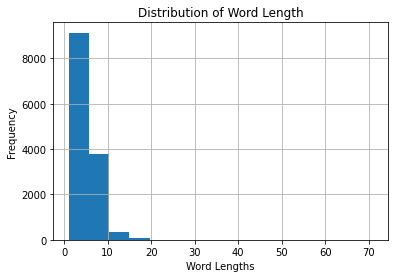

In [26]:
# A distribuição dos comprimentos das palavras
word_lengths = pd.Series([len(x) for x in word_list])

ax = word_lengths.hist(bins=15)
ax.set(xlabel='Word Lengths', ylabel='Frequency', title='Distribution of Word Length');

In [27]:
word_counts[:10]

[(727, 'saquarema'),
 (487, 'de'),
 (370, 'em'),
 (285, 't'),
 (283, 'https'),
 (283, 'co'),
 (232, 'e'),
 (226, 'o'),
 (206, 'que'),
 (185, 'eu')]

In [32]:
# Remova as stop words
from nltk.corpus import stopwords
nltk.download("stopwords")

stop_words = stopwords.words('portuguese')
stop_words.append('co')
stop_words.append('t')
stop_words.append('https')
stop_words.append('rt')

stop_lambda = lambda x: [y for y in x if y not in stop_words]
df2['tokens_stop'] = df2.tokens.apply(stop_lambda)
df2.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,ID,text,sentiment,tokens,tokens_stop
0,1633586240787210241,rt redmafia logo mais as tem boy from saq...,0.0,"[rt, redmafia, logo, mais, as, tem, boy, from,...","[redmafia, logo, boy, from, saquarema, ufbattl..."
1,1633586232667062274,rt centralbotafogo hoje eu sou apaixonado pe...,0.0,"[rt, centralbotafogo, hoje, eu, sou, apaixonad...","[centralbotafogo, hoje, apaixonado, boavista, ..."
2,1633585257071902721,fui chamada pra tomar um chopp de dia das mulh...,0.0,"[fui, chamada, pra, tomar, um, chopp, de, dia,...","[chamada, pra, tomar, chopp, dia, mulheres, sa..."
3,1633584527317540870,rt centralbotafogo hoje eu sou apaixonado pe...,0.0,"[rt, centralbotafogo, hoje, eu, sou, apaixonad...","[centralbotafogo, hoje, apaixonado, boavista, ..."
4,1633584403824668672,bruna querendo que va pra saquarema ver o film...,0.0,"[bruna, querendo, que, va, pra, saquarema, ver...","[bruna, querendo, va, pra, saquarema, ver, fil..."


In [33]:
word_list_stop = sum(df2.tokens_stop.tolist(), [])

In [34]:
word_list_stop[:10]

['redmafia',
 'logo',
 'boy',
 'from',
 'saquarema',
 'ufbattle',
 'torcedores',
 'red',
 'hj',
 'representam']

In [ ]:
# partes de speech tagging
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')
pos_lambda = lambda x: nltk.pos_tag(x)
df2['tokens_pos'] = (df2.tokens_stop.apply(pos_lambda))
df2.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,created_at,text,tokens,tokens_stop,tokens_pos
0,1631751677559668743,zrangelz oh my god its rangel from saqua...,"[zrangelz, oh, my, god, its, rangel, from, saq...","[zrangelz, oh, my, god, its, rangel, from, saq...","[(zrangelz, NN), (oh, UH), (my, PRP$), (god, N..."
1,1631741042872446979,saquarema lugar de ser feliz e amar saquarema,"[saquarema, lugar, de, ser, feliz, e, amar, sa...","[saquarema, lugar, feliz, amar, saquarema]","[(saquarema, NN), (lugar, NN), (feliz, NN), (a..."
2,1631736020059160576,meu pai roncava tão alto mas tão tão alto que ...,"[meu, pai, roncava, tão, alto, mas, tão, tão, ...","[pai, roncava, tão, alto, tão, tão, alto, gent...","[(pai, NN), (roncava, NN), (tão, NN), (alto, N..."
3,1631734455462232067,zrangelz elder rocklee nãooooo eu te acho...,"[zrangelz, elder, rocklee, nãooooo, eu, te, ac...","[zrangelz, elder, rocklee, nãooooo, acho, engr...","[(zrangelz, NN), (elder, NN), (rocklee, NN), (..."
4,1631730705259720704,dar um pulo ali em saquarema,"[dar, um, pulo, ali, em, saquarema]","[dar, pulo, ali, saquarema]","[(dar, NN), (pulo, NN), (ali, NN), (saquarema,..."


In [35]:
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('portuguese')
stem_lambda = lambda x: [stemmer.stem(y) for y in x]

df2['tokens_stem'] = df2.tokens_stop.apply(stem_lambda)
df2.head()

,ID,text,sentiment,tokens,tokens_stop,tokens_stem
0,1633586240787210241,rt redmafia logo mais as tem boy from saq...,0.0,"[rt, redmafia, logo, mais, as, tem, boy, from,...","[redmafia, logo, boy, from, saquarema, ufbattl...","[redmaf, log, boy, from, saquarem, ufbattl, to..."
1,1633586232667062274,rt centralbotafogo hoje eu sou apaixonado pe...,0.0,"[rt, centralbotafogo, hoje, eu, sou, apaixonad...","[centralbotafogo, hoje, apaixonado, boavista, ...","[centralbotafog, hoj, apaixon, boavist, desd, ..."
2,1633585257071902721,fui chamada pra tomar um chopp de dia das mulh...,0.0,"[fui, chamada, pra, tomar, um, chopp, de, dia,...","[chamada, pra, tomar, chopp, dia, mulheres, sa...","[cham, pra, tom, chopp, dia, mulh, saquarem]"
3,1633584527317540870,rt centralbotafogo hoje eu sou apaixonado pe...,0.0,"[rt, centralbotafogo, hoje, eu, sou, apaixonad...","[centralbotafogo, hoje, apaixonado, boavista, ...","[centralbotafog, hoj, apaixon, boavist, desd, ..."
4,1633584403824668672,bruna querendo que va pra saquarema ver o film...,0.0,"[bruna, querendo, que, va, pra, saquarema, ver...","[bruna, querendo, va, pra, saquarema, ver, fil...","[brun, quer, va, pra, saquarem, ver, film, noi..."


In [36]:
# Vamos encontrar as palavras mais comuns depois de limpar os dados

# Isso cria uma lista enorme combinando todos os valores de tokens
word_list_clean = sum(df2.tokens_stem.tolist(), [])

word_list_clean[:10]


['redmaf',
 'log',
 'boy',
 'from',
 'saquarem',
 'ufbattl',
 'torcedor',
 'red',
 'hj',
 'represent']

In [38]:
from collections import Counter

# Converte a lista em um dicionário com contagem de valores (usando o stop)
word_counts_stop = Counter(word_list_stop)
a = word_counts_stop

# Inverta a chave / valores no dicionário para classificar
word_counts_stop = list(zip(word_counts_stop.values(), word_counts_stop.keys()))

# Classifique a lista por contagem
word_counts_stop = sorted(word_counts_stop, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts_stop[:10]

[(727, 'saquarema'),
 (139, 'pra'),
 (76, 'hoje'),
 (59, 'boavista'),
 (55, 'praia'),
 (53, 'rj'),
 (52, 'vou'),
 (52, 'rio'),
 (52, 'aqui'),
 (50, 'desde')]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


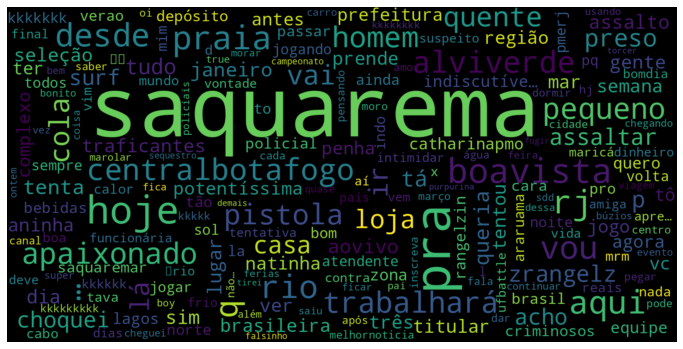

In [39]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = word_list_stop
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).fit_words(a)
# wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from collections import Counter

# Converte a lista em um dicionário com contagem de valores
word_counts_clean = Counter(word_list_clean)
a = word_counts_clean

# Inverta a chave / valores no dicionário para classificar
word_counts_clean = list(zip(word_counts_clean.values(), word_counts_clean.keys()))

# Classifique a lista por contagem
word_counts_clean = sorted(word_counts_clean, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts_clean[:10]

[(764, 'saquarema'),
 (562, 'de'),
 (360, 'em'),
 (321, 'e'),
 (220, 'a'),
 (204, 'que'),
 (199, 't'),
 (198, 'co'),
 (197, 'https'),
 (181, 'o')]

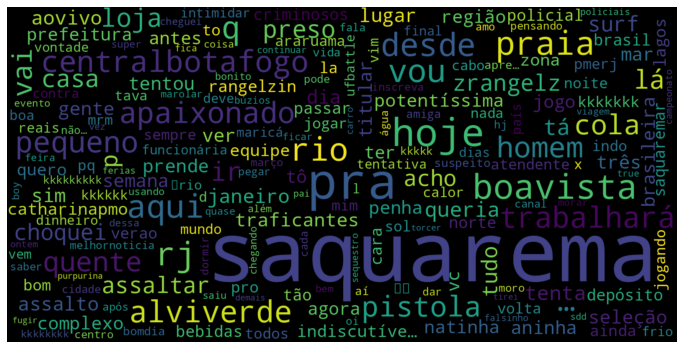

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = word_list_clean
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).fit_words(a)
# wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [41]:
comentarios = df2["text"].values
comentarios

array(['rt   redmafia  logo mais as   tem boy from saquarema na  ufbattle  os torcedores da red hj representam nossa reduda contra a los  manda t…',
       'rt  centralbotafogo  hoje eu sou apaixonado pelo boavista desde pequeno \n\no alviverde de saquarema trabalhará para nós  https   t co  …',
       'fui chamada pra tomar um chopp de dia das mulheres  mas estou em saquarema',
       'rt  centralbotafogo  hoje eu sou apaixonado pelo boavista desde pequeno \n\no alviverde de saquarema trabalhará para nós  https   t co  …',
       'bruna querendo que va pra saquarema ver o filme as   da noite mds',
       'rt   redmafia  logo mais as   tem boy from saquarema na  ufbattle  os torcedores da red hj representam nossa reduda contra a los  manda t…',
       'rt  a melhornoticia  🚨rio de janeiro \n🇧🇷 saquarema  l homem tenta assaltar loja com pistola de cola quente e é preso no rj  funcionária não…',
       'logo mais as   tem boy from saquarema na  ufbattle  os torcedores da red hj represent

In [42]:
classes = df2["sentiment"].values
classes

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.33333333,  0.        ,
        0.        ,  0.        ,  0.        ,  0.30714286,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.2       ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes             import MultinomialNB
from sklearn                         import metrics
from sklearn.model_selection         import cross_val_predict
from sklearn.ensemble                import RandomForestClassifier
from google.colab                    import drive
from nltk.corpus                     import stopwords

In [45]:
vectorizer = CountVectorizer(analyzer = "word")
freq_comentarios = vectorizer.fit_transform(comentarios)
modelo = MultinomialNB()
modelo.fit(freq_comentarios, classes)

#  Tenho que alterar para negativo, positivo e neutro

ValueError: ignored